Zachary Noel

Erin Dolson

Siddhesh Mahadeshwar

Team Jarlsberg

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn import datasets # import standard datasets
from sklearn import tree     # decision tree classifier
from sklearn import naive_bayes # naive bayes classifier 
from sklearn import svm        # svm classifier
from sklearn import ensemble   # ensemble classifiers
from sklearn import metrics    # performance evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import model_selection
from sklearn import preprocessing 
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import graphviz

# Part B

### Question 4

For the following data set, you will compute the true positive rate, false positive rate, and accuracy. Threshold the Ypred classifier output at each possible value (use a greater than equal to comparison)

Report the results as a matrix/table with rows corresponding with 10 rows and columns for the different thresholds, the true positive rate (TPR) false positive rate (FPR), and accuracy (ACC).

In [2]:
df = pd.DataFrame(np.array([[1, 1, .98], [2, 0, .92], [3, 1, .85], [4, 0, .77], [5, 0, .71], [6, 1, .64], [7, 1, .5], [8, 1, .39], [9, 0, .34], [10, 0, .31]]),
                   columns=['Sample', 'Ytrue', 'Ypred'])
col_names = columns=['ypred1', 'ypred2', 'ypred3', 'ypred4', 'ypred5', 'ypred6', 'ypred7', 'ypred8', 'ypred9', 'ypred10']
df_ypreds = pd.DataFrame(columns= col_names)
final_df = pd.DataFrame(columns = ['Thres.', 'TPR', 'FPR', 'Accuracy'])

# create a data frame containing the predicted values
for i in range (0,len(df)):
  threshold = df['Ypred'].values[i]
  temp_array = []
  for x in range (0, len(df)):
    comparison = df['Ypred'].values[x]
    if (threshold > comparison):
      temp_array.append(0.00)
    else:
      temp_array.append(1.00)
  df_ypreds[col_names[i]] = temp_array

# calculate values and put them into a final data frame
for i in range (0, len(df)):
  temp_array = []
  
  # create confusion matrix
  conf_matrix = metrics.confusion_matrix(df['Ytrue'], df_ypreds[col_names[i]]) 

  # calculate TPR, FPR, and Accuracy
  FPR, TPR, ignore = metrics.roc_curve(df['Ytrue'], df_ypreds[col_names[i]])
  accuracy = metrics.accuracy_score(df['Ytrue'], df_ypreds[col_names[i]])

  # add values to temporary data frame and add that to final
  df2 = pd.DataFrame([[df['Ypred'].values[i], TPR[1], FPR[1], accuracy]], columns=['Thres.', 'TPR', 'FPR', 'Accuracy'])
  final_df = final_df.append(df2, ignore_index=True)

print(final_df)

   Thres.  TPR  FPR  Accuracy
0    0.98  0.2  0.0       0.6
1    0.92  0.2  0.2       0.5
2    0.85  0.4  0.2       0.6
3    0.77  0.4  0.4       0.5
4    0.71  0.4  0.6       0.4
5    0.64  0.6  0.6       0.5
6    0.50  0.8  0.6       0.6
7    0.39  1.0  0.6       0.7
8    0.34  1.0  0.8       0.6
9    0.31  1.0  1.0       0.5


### Question 5

Use the results from Prob. 4 to plot the ROC curve for the data. Note, plot this curve using the standard plotting tools rather than any special library/package available in R, Python, or Matlab.

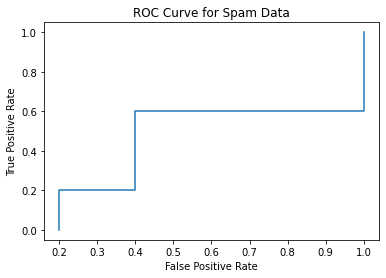

In [3]:
roc_auc = metrics.auc(FPR, TPR)
plt.title('ROC Curve for Spam Data')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Print ROC curve
plt.plot(final_df['TPR'], final_df['FPR'])
plt.show() 


### Question 6

#### a)


In [4]:
spam = pd.read_csv("spam.csv",
                   engine='python')
spam = spam[spam.columns.difference(['isuid', 'id', 'domain', 'spampct', 'category', 'cappct'])]
spam.head()

,box,chain,credit,day of week,digits,large text,local,name,porn,size.kb,spam,special,sucker,time of day,username
0,no,no,no,Thu,0,no,no,name,no,7,no,1,no,0,no
1,no,no,no,Thu,0,no,no,name,no,2,yes,5,no,0,no
2,no,yes,no,Thu,0,no,yes,name,no,3,no,2,no,14,no
3,yes,no,no,Thu,0,no,no,name,no,3,no,0,no,3,no
4,no,no,no,Thu,0,no,no,name,no,4,no,2,no,3,no


#### b)

##### i)


In [5]:
total_spam = spam.loc[spam.spam == 'yes', 'spam'].count()
total_count = len(spam)

print("Fraction of emails that are spam is " + str(total_spam) + " / " + str(total_count))

Fraction of emails that are spam is 710 / 2171


ii. What should the constant classifier predict?

We will pick the constant classifier to predict that the email will not be spam.



iii. What is the error rate of the constant classifier?


In [6]:
print("The error rate of the constant classifier will be " + str(round(total_spam/total_count, 5)))

The error rate of the constant classifier will be 0.32704


In [7]:
enc = OrdinalEncoder()
enc.fit(spam[["box", "chain", "credit", "day of week", "large text", "local", "name", "porn", "spam", "sucker", "username"]])
spam[["box", "chain", "credit", "day of week", "large text", "local", "name", "porn", "spam", "sucker", "username"]] = enc.transform(spam[["box",
      "chain", "credit", "day of week", "large text", "local", "name", "porn", "spam", "sucker", "username"]])

X = spam[spam.columns.difference(['spam'])]
Y = spam['spam']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size= 0.2, random_state= 124)


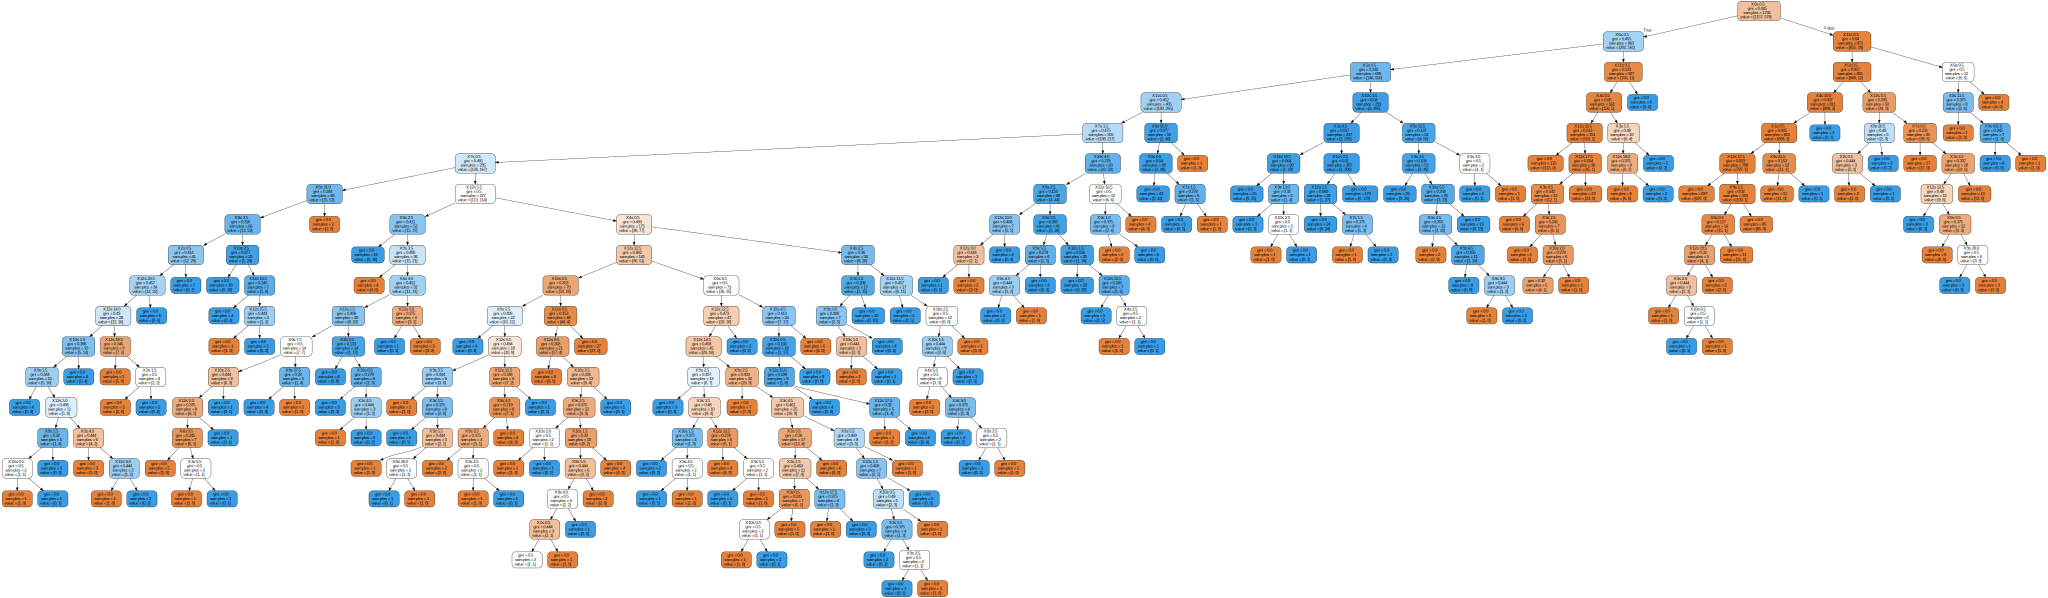

In [8]:
dt = tree.DecisionTreeClassifier()
dtf = dt.fit(X_train, Y_train)
dot_data = tree.export_graphviz(dt, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

e) (2 points) Which selection criteria is used by default when learning the tree model?

The selection criteria utilizes the GINI index by default.

f) Estimate the performance of the decision tree on the training set and the testing set. Report accuracy, sensitivity, specificity, and AUC (if a method returns a probability rather than a label use a threshold of 0.5).


In [9]:
y_pred_te = dt.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, y_pred_te).ravel()
accuracy = metrics.accuracy_score(Y_test, y_pred_te)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
auc_score1 = roc_auc_score(Y_test, y_pred_te)

print("ACCURACY: " + str(accuracy))
print("SPECIFICITY: " + str(specificity))
print("SENSITIVITY: " + str(sensitivity))
print("AUC: " + str(auc_score1))

ACCURACY: 0.903448275862069
SPECIFICITY: 0.9506578947368421
SENSITIVITY: 0.7938931297709924
AUC: 0.8722755122539173


g) Try pruning the tree, print out the tree that is a different size and report the
classification performance (accuracy, sensitivity, specificity, and AUC).

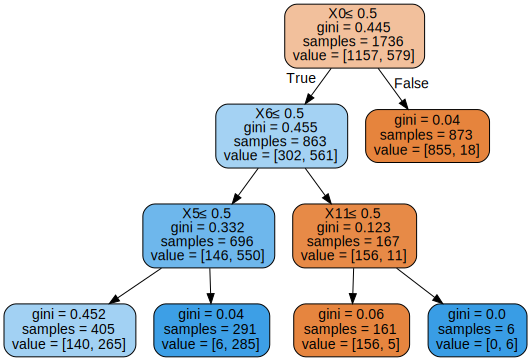

In [10]:
dt = tree.DecisionTreeClassifier(max_leaf_nodes = 5, max_depth= 10)
dtf = dt.fit(X_train, Y_train)
dot_data = tree.export_graphviz(dt, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


In [11]:
y_pred_te = dt.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, y_pred_te).ravel()
accuracy = metrics.accuracy_score(Y_test, y_pred_te)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
auc_score1 = roc_auc_score(Y_test, y_pred_te)

print("ACCURACY: " + str(accuracy))
print("SPECIFICITY: " + str(specificity))
print("SENSITIVITY: " + str(sensitivity))
print("AUC: " + str(auc_score1))

ACCURACY: 0.8896551724137931
SPECIFICITY: 0.8717105263157895
SENSITIVITY: 0.9312977099236641
AUC: 0.9015041181197267


### Question 7

a) Prepare the data for a 10-fold cross-validation

In [12]:
# Normalize data
y = MinMaxScaler()
spam.loc[:,spam.columns] = y.fit_transform(spam.loc[:,spam.columns])
spam.head()

# Feature Matrix and Target Array
X = spam[spam.columns.difference(['spam'])]
Y = spam['spam']

nFolds = 10
kf = model_selection.StratifiedKFold(n_splits=nFolds, shuffle=True, random_state=3)

b) For each of the following methods, estimate the generalization performance over the 10-
folds, calculate and report the accuracy, sensitivity, specificity, and AUC performance on
the testing data (for each split and averaged over the splits). Show the results in a table.
Hint: You can use one for loop and create all the models required below within it to avoid
duplicating code.

ii. Use kNN to predict whether an email is spam. Show performance values for these values of k = 3, 7, 11, 15

Use  Decision  Trees  to  predict  whether  an  email  is  spam.   Estimate  the generalization performance over the 10-folds, calculate and report the accuracy, sen-sitivity,  specificity,  and  AUC  performance  on  the  testing  data  (for  each  split  andaveraged over the splits).  Show the results for two different sized decision trees (con-sider different amounts of pruning).

Use a Naive Bayes classifier to predict whether an email is spam.

In [13]:
col_names = ['Knn3', 'Knn7', 'Knn11', 'Knn15', 'Decision_Tree1', 'Decision_Tree2', 'NB']
accuracy_df = pd.DataFrame()
specificity_df = pd.DataFrame()
sensitivity_df = pd.DataFrame()
AUC_df = pd.DataFrame()
k_values=[3,7,11,15]
sizes = [10, 100]

for x in range(0,7):
  knn_kcv_scores = []
  specificity_scores = []
  sensitivity_scores = []
  AUC_scores = []

  for tr_indx, te_indx in kf.split(X, Y):
      x_train, x_test = X.iloc[tr_indx], X.iloc[te_indx]
      y_train, y_test = Y[tr_indx], Y[te_indx]
      # knn
      if x < 4:
        knn = neighbors.KNeighborsClassifier(n_neighbors=k_values[x])
        knn.fit(x_train, y_train)
        y_pred_te = knn.predict(x_test)
      # Decision Tree 1 and 2
      elif x == 4 or x == 5:
        clf = DecisionTreeClassifier(random_state=0, max_depth=sizes[x-4])
        clf.fit(x_train, y_train)
        y_pred_te = clf.predict(x_test)
      #NB
      else:
        gnb = naive_bayes.GaussianNB()
        y_pred_test = gnb.fit(x_train, y_train)
        y_pred_te = gnb.predict(x_test)
      # calculate scores or values  
      knn_kcv_scores.append(metrics.accuracy_score(y_test, y_pred_te))
      tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_te).ravel()
      specificity = tn / (tn + fp)
      sensitivity = tp / (tp + fn)
      auc_score1 = roc_auc_score(y_test, y_pred_te)

      specificity_scores.append(specificity)
      sensitivity_scores.append(sensitivity)
      AUC_scores.append(auc_score1)

  knn_kcv_scores.append(np.mean(knn_kcv_scores))
  panda_df = pd.DataFrame(data = knn_kcv_scores,   
                        columns = [col_names[x]])
  accuracy_df = pd.concat([accuracy_df, panda_df], axis=1)

  
  specificity_scores.append(np.mean(specificity_scores))
  panda_df1 = pd.DataFrame(data = specificity_scores,   
                        columns = [col_names[x]])
  specificity_df = pd.concat([specificity_df, panda_df1], axis=1)

  
  sensitivity_scores.append(np.mean(sensitivity_scores))
  panda_df2 = pd.DataFrame(data = sensitivity_scores,   
                        columns = [col_names[x]])
  sensitivity_df = pd.concat([sensitivity_df, panda_df2], axis=1)


  AUC_scores.append(np.mean(AUC_scores))
  panda_df3 = pd.DataFrame(data = AUC_scores,   
                        columns = [col_names[x]])
  AUC_df = pd.concat([AUC_df, panda_df3], axis=1)

my_list = [accuracy_df, specificity_df, sensitivity_df, AUC_df]
for x in my_list:
  x.index = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Mean'] 
print("Accuracy")
print(accuracy_df)

print("\nSpecificity")
print(specificity_df)

print("\nSensitivity")
print(sensitivity_df)

print("\nAUC")
print(AUC_df)


Accuracy
          Knn3      Knn7     Knn11  ...  Decision_Tree1  Decision_Tree2        NB
1     0.908257  0.931193  0.908257  ...        0.885321        0.908257  0.894495
2     0.917051  0.907834  0.917051  ...        0.907834        0.921659  0.884793
3     0.880184  0.889401  0.903226  ...        0.884793        0.912442  0.884793
4     0.930876  0.930876  0.940092  ...        0.903226        0.935484  0.926267
5     0.917051  0.898618  0.912442  ...        0.875576        0.875576  0.880184
6     0.894009  0.884793  0.884793  ...        0.898618        0.898618  0.875576
7     0.917051  0.917051  0.912442  ...        0.926267        0.926267  0.880184
8     0.921659  0.921659  0.926267  ...        0.912442        0.949309  0.884793
9     0.912442  0.903226  0.912442  ...        0.926267        0.935484  0.903226
10    0.926267  0.921659  0.926267  ...        0.898618        0.898618  0.898618
Mean  0.912485  0.910631  0.914328  ...        0.901896        0.916171  0.891293

[11 ro